# ** Titanic Survival Prediction using NAIVE BAYES**

### *Importing basic Libraries*

In [1]:
import pandas as pd
import numpy as np

### *Choose Dataset file from Local Directory*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanicsurvival.csv to titanicsurvival.csv


### *Load Dataset*

In [12]:
dataset = pd.read_csv('titanicsurvival.csv')

In [13]:
dataset.head()

,Pclass,Gender,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [35]:
dataset['Age'].value_counts()

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


<ipython-input-30-006e11b892db>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', order = dataset['Gender'].value_counts().index, data=dataset,ax=ax[1], palette = 'muted')


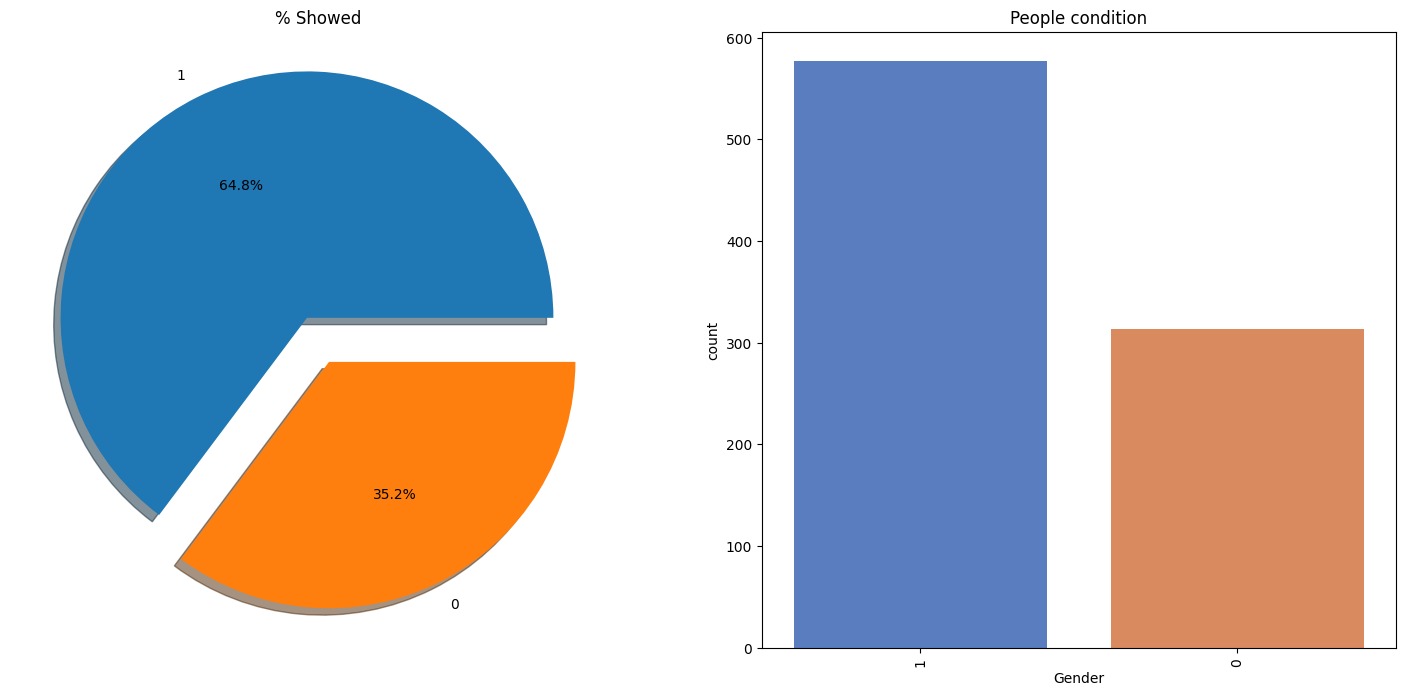

In [30]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_data' is your DataFrame.  If not, replace with your DataFrame name.
# Example: final_data = dataset  # Replace 'dataset' if your DataFrame has a different name

f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Showed')
ax[0].set_ylabel('')
sns.countplot(x='Gender', order = dataset['Gender'].value_counts().index, data=dataset,ax=ax[1], palette = 'muted')
plt.xticks(rotation = 90)
ax[1].set_title('People condition')
plt.show()


<ipython-input-38-9241396b2872>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', order = dataset['Survived'].value_counts().index, data=dataset,ax=ax[1], palette = 'muted')


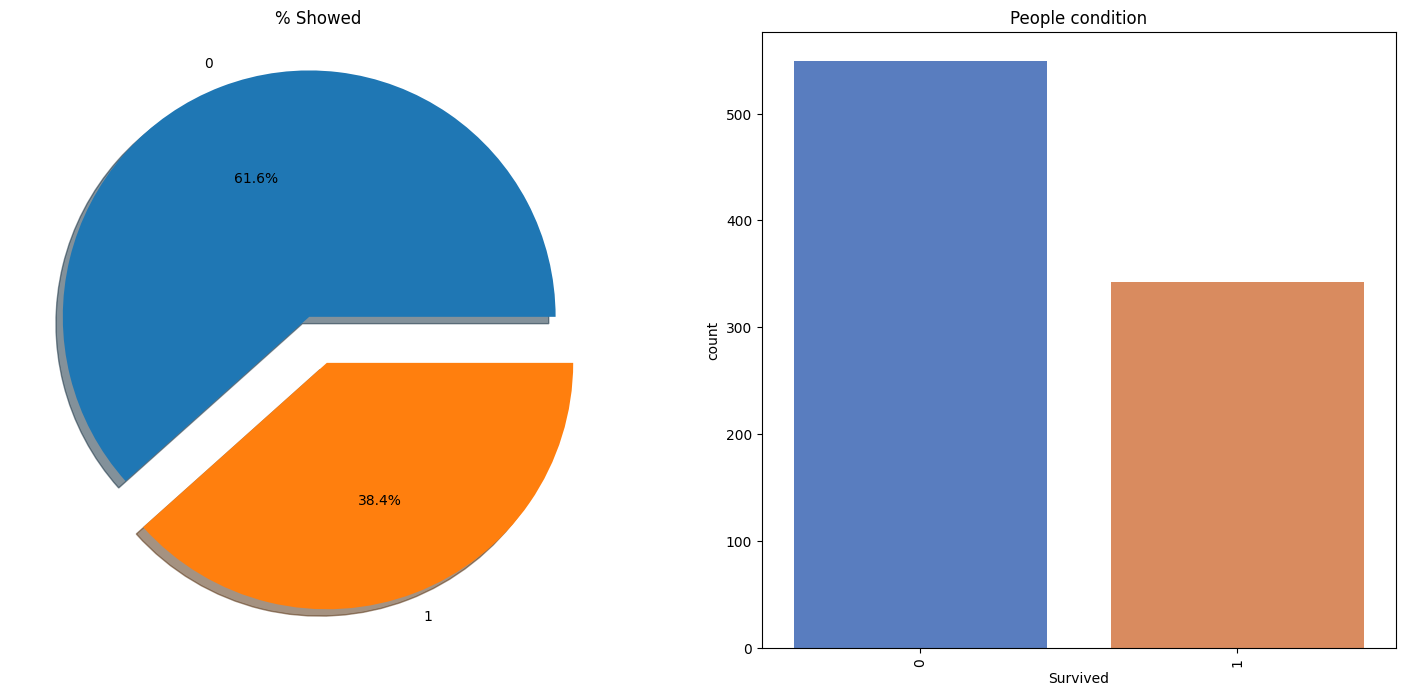

In [38]:


import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_data' is your DataFrame.  If not, replace with your DataFrame name.
# Example: final_data = dataset  # Replace 'dataset' if your DataFrame has a different name

f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Survived'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('% Showed')
ax[0].set_ylabel('')
sns.countplot(x='Survived', order = dataset['Survived'].value_counts().index, data=dataset,ax=ax[1], palette = 'muted')
plt.xticks(rotation = 90)
ax[1].set_title('People condition')
plt.show()


### *Summarize Dataset*

In [14]:
print(dataset.shape)
print(dataset.head(5))

(891, 5)
   Pclass  Gender   Age     Fare  Survived
0       3    male  22.0   7.2500         0
1       1  female  38.0  71.2833         1
2       3  female  26.0   7.9250         1
3       1  female  35.0  53.1000         1
4       3    male  35.0   8.0500         0


### *Mapping Text Data to Binary Value*

In [15]:
income_set = set(dataset['Gender'])
dataset['Gender'] = dataset['Gender'].map({'female': 0, 'male': 1}).astype(int)
print(dataset.head)

<bound method NDFrame.head of      Pclass  Gender   Age     Fare  Survived
0         3       1  22.0   7.2500         0
1         1       0  38.0  71.2833         1
2         3       0  26.0   7.9250         1
3         1       0  35.0  53.1000         1
4         3       1  35.0   8.0500         0
..      ...     ...   ...      ...       ...
886       2       1  27.0  13.0000         0
887       1       0  19.0  30.0000         1
888       3       0   NaN  23.4500         0
889       1       1  26.0  30.0000         1
890       3       1  32.0   7.7500         0

[891 rows x 5 columns]>


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [16]:
X = dataset.drop('Survived',axis='columns')
X

,Pclass,Gender,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,NaN,23.4500
889,1,1,26.0,30.0000


In [17]:
Y = dataset.Survived
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


Finding & Removing NA values from our Features X

In [18]:
X.columns[X.isna().any()]

Index(['Age'], dtype='object')

In [19]:
X.Age = X.Age.fillna(X.Age.mean())

### *Test again to check any na value*

In [20]:
X.columns[X.isna().any()]

Index([], dtype='object')

### *Splitting Dataset into Train & Test*

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25,random_state =0)

### *Training*

In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### *Predicting, wheather Person Survived or Not*

In [23]:
pclassNo = int(input("Enter Person's Pclass number: "))
gender = int(input("Enter Person's Gender 0-female 1-male(0 or 1): "))
age = int(input("Enter Person's Age: "))
fare = float(input("Enter Person's Fare: "))
person = [[pclassNo,gender,age,fare]]
result = model.predict(person)
print(result)

if result == 1:
  print("Person might be Survived")
else:
  print("Person might not be Survived")

Enter Person's Pclass number: 123
Enter Person's Gender 0-female 1-male(0 or 1): 1
Enter Person's Age: 24
Enter Person's Fare: 34
[1]
Person might be Survived


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


### *Prediction for all Test Data*

In [24]:
y_pred = model.predict(X_test)
print(np.column_stack((y_pred,y_test)))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]

### *Accuracy of our Model*

In [25]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy of the Model: 77.57847533632287%
